# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:50%; text-align:center; border-radius:6px 6px;">San Francisco Airport - Clustering</p>

![image.jpg](https://upload.wikimedia.org/wikipedia/commons/d/d6/San_Francisco_International_Airport_at_night.jpg)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [ ]:
df.columns = df.columns.str.replace(" ","_")

In [ ]:
df.isnull().sum() 

Activity_Period                 0
Operating_Airline               0
Operating_Airline_IATA_Code    63
Published_Airline               0
Published_Airline_IATA_Code    63
GEO_Summary                     0
GEO_Region                      0
Activity_Type_Code              0
Price_Category_Code             0
Terminal                        0
Boarding_Area                   0
Passenger_Count                 0
dtype: int64

In [ ]:
df.shape

(18885, 12)

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(18822, 12)

In [ ]:
df.isnull().sum()

Activity_Period                0
Operating_Airline              0
Operating_Airline_IATA_Code    0
Published_Airline              0
Published_Airline_IATA_Code    0
GEO_Summary                    0
GEO_Region                     0
Activity_Type_Code             0
Price_Category_Code            0
Terminal                       0
Boarding_Area                  0
Passenger_Count                0
dtype: int64

In [ ]:
df.sample(5)

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count
8395,201107,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Deplaned,Other,International,A,7273
1250,200606,Air Canada Jazz,QK,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,116
10457,201301,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,7105
11405,201309,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 1,B,5279
14052,201508,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Other,International,A,10122


In [ ]:
df.Operating_Airline.value_counts()  # 84 airline category

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
World Airways                          3
Atlas Air, Inc                         2
Evergreen International Airlines       2
Xtra Airways                           2
Icelandair EHF                         2
Name: Operating_Airline, Length: 84, dtype: int64

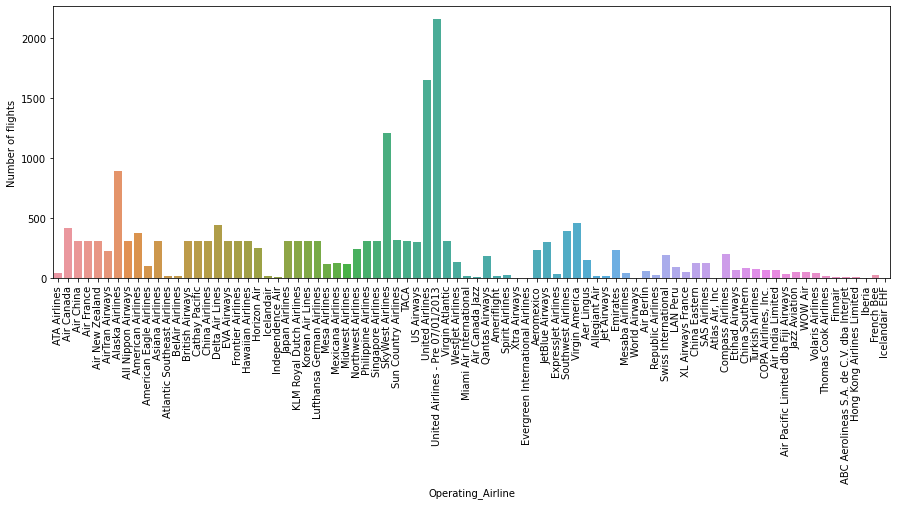

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("Operating_Airline",data=df);
plt.xticks(rotation=90);
plt.ylabel("Number of flights");

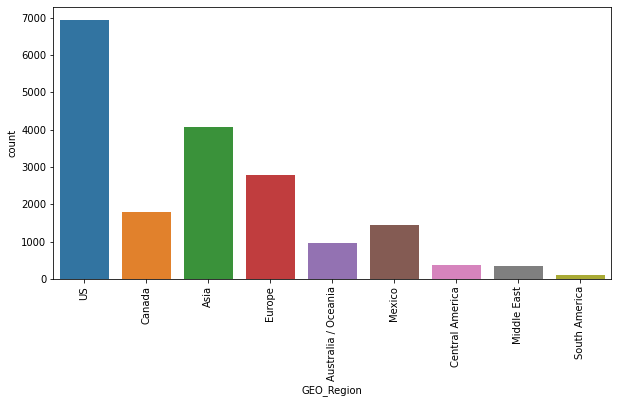

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df['GEO_Region'])
plt.xticks(rotation=90);

In [ ]:
df.Operating_Airline.value_counts()

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
World Airways                          3
Atlas Air, Inc                         2
Evergreen International Airlines       2
Xtra Airways                           2
Icelandair EHF                         2
Name: Operating_Airline, Length: 84, dtype: int64

In [ ]:
df.groupby(df["Operating_Airline"]).sum()["Passenger_Count"].sort_values(ascending=False)

Operating_Airline
United Airlines                     112640408
United Airlines - Pre 07/01/2013    105363917
SkyWest Airlines                     44582356
American Airlines                    43622387
Virgin America                       37843920
                                      ...    
World Airways                             785
Xtra Airways                              146
Ameriflight                               110
Atlas Air, Inc                             68
Evergreen International Airlines            4
Name: Passenger_Count, Length: 84, dtype: int64

In [ ]:
df.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count'],
      dtype='object')

**Unsupervised learning is the approach we use when we have little or no idea what the output we want from our data will look like. We can create the model from the data that we do not know the effect of the variables. In “unsupervised learning” there are only data, no information is given about them.
Clustering is called clustering by analyzing data according to criteria such as proximity, distance, and similarity.**



In [ ]:
x = df[['Passenger_Count','Operating_Airline','GEO_Region']]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18822 entries, 0 to 18884
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Passenger_Count    18822 non-null  int64 
 1   Operating_Airline  18822 non-null  object
 2   GEO_Region         18822 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
x=pd.get_dummies(x,drop_first=True)
model=KMeans(n_clusters=4)
pred=model.fit_predict(x)

x['Cluster']=pred
x.sample(5)

,Passenger_Count,Operating_Airline_ATA Airlines,Operating_Airline_Aer Lingus,Operating_Airline_Aeromexico,Operating_Airline_Air Berlin,Operating_Airline_Air Canada,Operating_Airline_Air Canada Jazz,Operating_Airline_Air China,Operating_Airline_Air France,Operating_Airline_Air India Limited,Operating_Airline_Air New Zealand,Operating_Airline_Air Pacific Limited dba Fiji Airways,Operating_Airline_AirTran Airways,Operating_Airline_Alaska Airlines,Operating_Airline_All Nippon Airways,Operating_Airline_Allegiant Air,Operating_Airline_American Airlines,Operating_Airline_American Eagle Airlines,Operating_Airline_Ameriflight,Operating_Airline_Asiana Airlines,Operating_Airline_Atlantic Southeast Airlines,"Operating_Airline_Atlas Air, Inc",Operating_Airline_BelAir Airlines,Operating_Airline_British Airways,"Operating_Airline_COPA Airlines, Inc.",Operating_Airline_Cathay Pacific,Operating_Airline_China Airlines,Operating_Airline_China Eastern,Operating_Airline_China Southern,Operating_Airline_Compass Airlines,Operating_Airline_Delta Air Lines,Operating_Airline_EVA Airways,Operating_Airline_Emirates,Operating_Airline_Etihad Airways,Operating_Airline_Evergreen International Airlines,Operating_Airline_ExpressJet Airlines,Operating_Airline_Finnair,Operating_Airline_French Bee,Operating_Airline_Frontier Airlines,Operating_Airline_Hawaiian Airlines,Operating_Airline_Hong Kong Airlines Limited,Operating_Airline_Horizon Air,Operating_Airline_Iberia,Operating_Airline_Icelandair,Operating_Airline_Icelandair EHF,Operating_Airline_Independence Air,Operating_Airline_Japan Airlines,Operating_Airline_Jazz Aviation,Operating_Airline_Jet Airways,Operating_Airline_JetBlue Airways,Operating_Airline_KLM Royal Dutch Airlines,Operating_Airline_Korean Air Lines,Operating_Airline_LAN Peru,Operating_Airline_Lufthansa German Airlines,Operating_Airline_Mesa Airlines,Operating_Airline_Mesaba Airlines,Operating_Airline_Mexicana Airlines,Operating_Airline_Miami Air International,Operating_Airline_Midwest Airlines,Operating_Airline_Northwest Airlines,Operating_Airline_Philippine Airlines,Operating_Airline_Qantas Airways,Operating_Airline_Republic Airlines,Operating_Airline_SAS Airlines,Operating_Airline_Singapore Airlines,Operating_Airline_SkyWest Airlines,Operating_Airline_Southwest Airlines,Operating_Airline_Spirit Airlines,Operating_Airline_Sun Country Airlines,Operating_Airline_Swiss International,Operating_Airline_TACA,Operating_Airline_Thomas Cook Airlines,Operating_Airline_Turkish Airlines,Operating_Airline_US Airways,Operating_Airline_United Airlines,Operating_Airline_United Airlines - Pre 07/01/2013,Operating_Airline_Virgin America,Operating_Airline_Virgin Atlantic,Operating_Airline_Volaris Airlines,Operating_Airline_WOW Air,Operating_Airline_WestJet Airlines,Operating_Airline_World Airways,Operating_Airline_XL Airways France,Operating_Airline_Xtra Airways,GEO_Region_Australia / Oceania,GEO_Region_Canada,GEO_Region_Central America,GEO_Region_Europe,GEO_Region_Mexico,GEO_Region_Middle East,GEO_Region_South America,GEO_Region_US,Cluster
15597,36984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
13287,12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
13738,5067,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17762,18600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8769,9664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
x.shape

(18822, 93)

In [ ]:
def cluster(x,clusters):
    
    x=x
    allscore = []
    allclusters = []
    sum_of_squared_distances = []
    
    for i in np.arange(1,clusters):
        
        i+=1
        model=KMeans(n_clusters=i,random_state=42)
        pred=model.fit_predict(x)
        s_score=silhouette_score(x,pred)
        print('Number of cluster: {} , Score: {}'.format(i,s_score))
        allscore.append(s_score)
        allclusters.append(i)
        sum_of_squared_distances.append(model.inertia_)
        
    plt.figure(figsize=(10,10))
    plt.plot(allclusters,sum_of_squared_distances,marker='x',c='r'); 

Number of cluster: 2 , Score: 0.8593933357613563
Number of cluster: 3 , Score: 0.8283826839620435
Number of cluster: 4 , Score: 0.7860962051330908
Number of cluster: 5 , Score: 0.7844848740659552
Number of cluster: 6 , Score: 0.6616385768863845
Number of cluster: 7 , Score: 0.6621618432365732
Number of cluster: 8 , Score: 0.6439603357818434
Number of cluster: 9 , Score: 0.6403031685200148
Number of cluster: 10 , Score: 0.6148167593779065


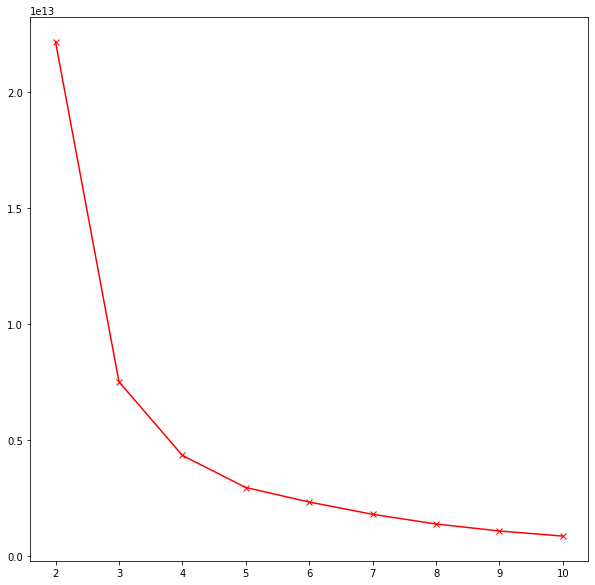

In [ ]:
cluster(x,10)

In [ ]:
silhouette_score(x,pred)

0.7862176464290082

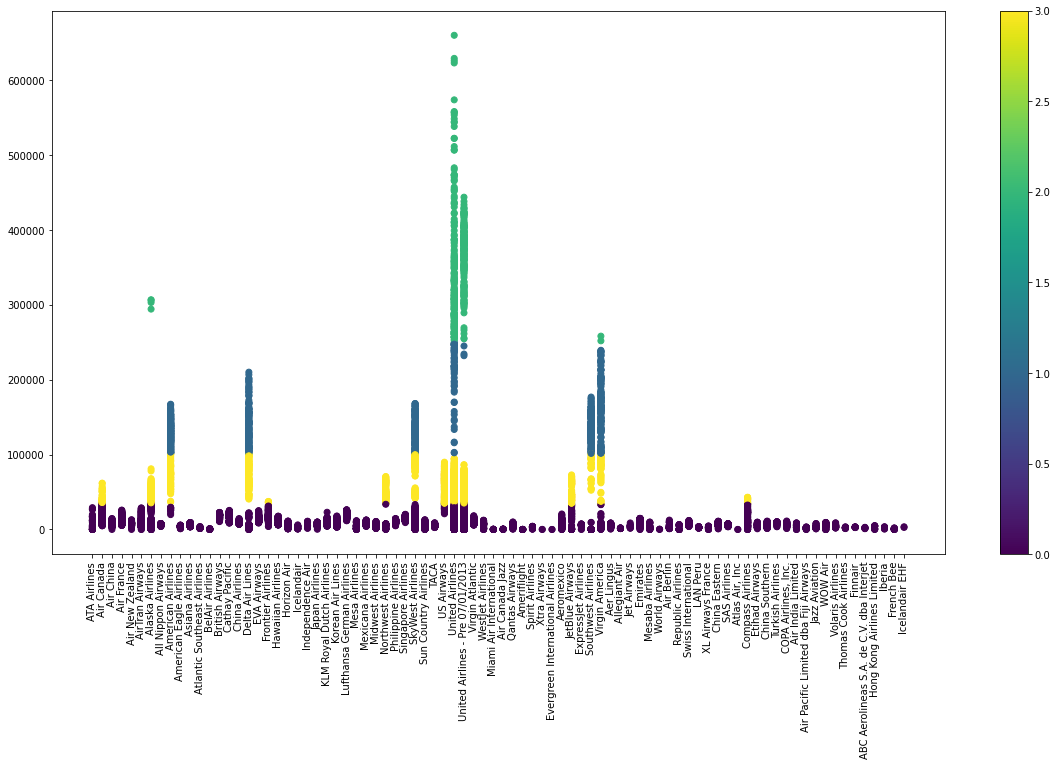

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(x=df['Operating_Airline'],y=df['Passenger_Count'],c=pred)
plt.xticks(rotation=90)
plt.colorbar()
plt.show();

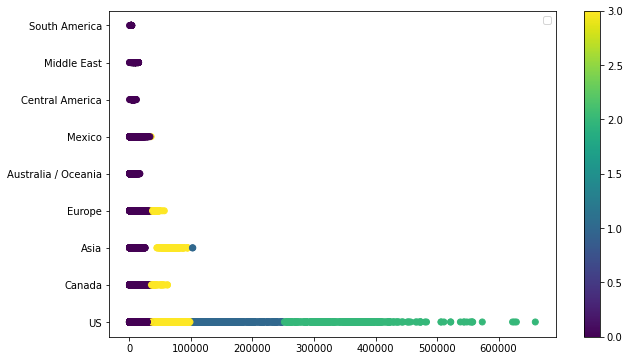

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["Passenger_Count"],y=df["GEO_Region"],c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [64]:
x.groupby("Cluster").mean()


,Passenger_Count,Operating_Airline_ATA Airlines,Operating_Airline_Aer Lingus,Operating_Airline_Aeromexico,Operating_Airline_Air Berlin,Operating_Airline_Air Canada,Operating_Airline_Air Canada Jazz,Operating_Airline_Air China,Operating_Airline_Air France,Operating_Airline_Air India Limited,Operating_Airline_Air New Zealand,Operating_Airline_Air Pacific Limited dba Fiji Airways,Operating_Airline_AirTran Airways,Operating_Airline_Alaska Airlines,Operating_Airline_All Nippon Airways,Operating_Airline_Allegiant Air,Operating_Airline_American Airlines,Operating_Airline_American Eagle Airlines,Operating_Airline_Ameriflight,Operating_Airline_Asiana Airlines,Operating_Airline_Atlantic Southeast Airlines,"Operating_Airline_Atlas Air, Inc",Operating_Airline_BelAir Airlines,Operating_Airline_British Airways,"Operating_Airline_COPA Airlines, Inc.",Operating_Airline_Cathay Pacific,Operating_Airline_China Airlines,Operating_Airline_China Eastern,Operating_Airline_China Southern,Operating_Airline_Compass Airlines,Operating_Airline_Delta Air Lines,Operating_Airline_EVA Airways,Operating_Airline_Emirates,Operating_Airline_Etihad Airways,Operating_Airline_Evergreen International Airlines,Operating_Airline_ExpressJet Airlines,Operating_Airline_Finnair,Operating_Airline_French Bee,Operating_Airline_Frontier Airlines,Operating_Airline_Hawaiian Airlines,Operating_Airline_Hong Kong Airlines Limited,Operating_Airline_Horizon Air,Operating_Airline_Iberia,Operating_Airline_Icelandair,Operating_Airline_Icelandair EHF,Operating_Airline_Independence Air,Operating_Airline_Japan Airlines,Operating_Airline_Jazz Aviation,Operating_Airline_Jet Airways,Operating_Airline_JetBlue Airways,Operating_Airline_KLM Royal Dutch Airlines,Operating_Airline_Korean Air Lines,Operating_Airline_LAN Peru,Operating_Airline_Lufthansa German Airlines,Operating_Airline_Mesa Airlines,Operating_Airline_Mesaba Airlines,Operating_Airline_Mexicana Airlines,Operating_Airline_Miami Air International,Operating_Airline_Midwest Airlines,Operating_Airline_Northwest Airlines,Operating_Airline_Philippine Airlines,Operating_Airline_Qantas Airways,Operating_Airline_Republic Airlines,Operating_Airline_SAS Airlines,Operating_Airline_Singapore Airlines,Operating_Airline_SkyWest Airlines,Operating_Airline_Southwest Airlines,Operating_Airline_Spirit Airlines,Operating_Airline_Sun Country Airlines,Operating_Airline_Swiss International,Operating_Airline_TACA,Operating_Airline_Thomas Cook Airlines,Operating_Airline_Turkish Airlines,Operating_Airline_US Airways,Operating_Airline_United Airlines,Operating_Airline_United Airlines - Pre 07/01/2013,Operating_Airline_Virgin America,Operating_Airline_Virgin Atlantic,Operating_Airline_Volaris Airlines,Operating_Airline_WOW Air,Operating_Airline_WestJet Airlines,Operating_Airline_World Airways,Operating_Airline_XL Airways France,Operating_Airline_Xtra Airways,GEO_Region_Australia / Oceania,GEO_Region_Canada,GEO_Region_Central America,GEO_Region_Europe,GEO_Region_Mexico,GEO_Region_Middle East,GEO_Region_South America,GEO_Region_US,predicted_clusters
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9258.485681,0.002877,0.009939,0.0153,0.003923,0.0238,0.000915,0.020466,0.0204,0.004315,0.020466,0.002485,0.014777,0.043743,0.0204,0.001046,0.000785,0.006931,0.001438,0.0204,0.001438,0.000131,0.001438,0.0204,0.004446,0.0204,0.0204,0.008239,0.005623,0.011835,0.008696,0.0204,0.0153,0.004708,0.000131,0.002092,0.000785,0.001569,0.019877,0.0204,0.000719,0.016739,0.000392,0.001308,0.000131,0.000654,0.020466,0.003269,0.001046,0.008173,0.0204,0.0204,0.005885,0.0204,0.007715,0.002877,0.008108,0.001046,0.007585,0.008631,0.0204,0.012292,0.001569,0.008239,0.0204,0.056100,0.00850,0.001569,0.020727,0.012619,0.0204,0.001046,0.0051,0.002681,0.068197,0.107624,0.013665,0.0204,0.003138,0.003662,0.008827,0.000196,0.003335,0.000131,0.062181,0.113639,0.024912,0.177651,0.09507,0.023146,0.00595,0.251602,3.020335
1,143145.930519,0.000000,0.00

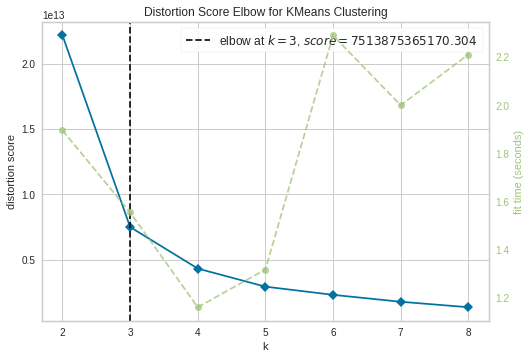

In [47]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(x)        # Fit the data to the visualizer.3 means that 4 divided group because of starting of the cluster number.
visualizer.show();

**As is seen, the operating airline can be divided into 4 cluster according to their number of passangers and regions.We can see the united airlines has the highest density.**